In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
ipos_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/COTAHIST_A2015_2021.csv")
ipo_detail_df = pd.read_excel("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_details.xlsx")
ipo_rent = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/ipo_rent.csv")

In [3]:
detailed = pd.concat([ipo_detail_df.set_index('TICKER'), ipo_rent.set_index('TICKER')], axis=1)
detailed = detailed.dropna()

In [4]:
x = "VOLUME TOTAL (R$)"

In [5]:
detailed['ESTRANGEIROS'] = detailed['ESTRANGEIROS'] * detailed[x]
detailed['VAREJO'] = detailed['VAREJO'] * detailed[x]
detailed['INSTITUCIONAL'] = detailed['INSTITUCIONAL'] * detailed[x]
detailed['OUTROS'] = detailed['OUTROS'] * detailed[x]

In [6]:
detailed['Sum'] = detailed['ESTRANGEIROS'] + detailed['INSTITUCIONAL']

In [7]:
detailed

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,today,Sum
TICKER,,,,,,,,,,,
PSVM11,2.22,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52.702703,17.117117,177.927928,0.000000e+00
WIZS3,12.33,4527,6.028000e+08,5.920787e+07,2.255063e+08,3.143487e+08,3.737112e+06,12.733171,18.410381,-5.515004,5.398550e+08
AALR3,20.00,2035,6.741976e+08,6.304443e+07,2.492294e+08,3.575474e+08,4.376336e+06,-4.000000,-23.750000,-44.050000,6.067768e+08
MOVI3,7.50,1373,6.000838e+08,5.604806e+07,1.852221e+08,2.702926e+08,8.852101e+07,-2.666667,-1.333333,136.000000,4.555147e+08
PARD3,19.00,5042,8.776688e+08,8.823148e+07,4.215041e+08,3.626088e+08,5.324427e+06,8.947368,5.526316,10.000000,7.841129e+08
...,...,...,...,...,...,...,...,...,...,...,...
GGPS3,12.00,0,2.164502e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666667,1.666667,20.750000,0.000000e+00
SOJA3,9.90,0,4.000000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,46.464646,52.020202,61.212121,0.000000e+00
CXSE3,9.67,0,4.351500e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.929679,20.475698,23.991727,0.000000e+00


In [8]:
columns = ['VOLUME TOTAL (R$)', 'VAREJO', 'INSTITUCIONAL', 'ESTRANGEIROS', 'OUTROS']
list_scores = []
for c in columns:
    list_scores.append(zscore(detailed[c]))
list_scores

[array([-0.95736218, -0.60062234, -0.55836892, -0.60222981, -0.43795371,
         0.23869662,  1.9855081 ,  0.22838406, -0.49032389, -0.27826637,
         0.21625854,  2.01590125,  0.65182322,  1.07357734, -0.55940049,
        -0.54007993,  1.25851932,  0.36878288, -0.13398181,  0.08111802,
        -0.33435331, -0.17313525, -0.30349677, -0.83900126, -0.77964325,
        -0.31679284,  0.12120175, -0.72057198,  0.36340743, -0.34954095,
        -0.44902384,  0.83616816, -0.58250021, -0.57397638,  0.82968946,
        -0.37887316,  0.32670122, -0.42127131,  1.50552208, -0.66606615,
        -0.58488293, -0.37341819, -0.37625558, -0.54901698, -0.77627435,
         5.78377427, -0.66947882, -0.48239044, -0.18520836,  0.60596268,
        -0.18558976, -0.23831949, -0.40501119, -0.54845477, -0.50010434,
        -0.22846601, -0.32413122, -0.66923333, -0.50880723, -0.21273269,
         1.98111126, -0.44806186, -0.84576459, -0.12451296, -0.30887155,
         0.32360021, -0.72064033,  1.61787565,  0.8

In [9]:
df = pd.DataFrame(data=list_scores)
DF = df.T
DF

,0,1,2,3,4
0,-0.957362,-0.722734,-0.875148,-0.653682,-0.515825
1,-0.600622,-0.432980,-0.565113,-0.306214,-0.426837
2,-0.558369,-0.414205,-0.532498,-0.258463,-0.411615
3,-0.602230,-0.448444,-0.620498,-0.354911,1.592051
4,-0.437954,-0.290944,-0.295648,-0.252869,-0.389039
...,...,...,...,...,...
65,0.323600,-0.722734,-0.875148,-0.653682,-0.515825
66,-0.720640,-0.722734,-0.875148,-0.653682,-0.515825
67,1.617876,-0.722734,-0.875148,-0.653682,-0.515825
68,0.856242,-0.722734,-0.875148,-0.653682,-0.515825


In [10]:
DF['Sum'] = 0
for c in range(5):
    DF['Sum'] += abs(DF[c])
cx = pd.DataFrame.to_numpy(DF['Sum'])

In [11]:
detailed['Z-score'] = cx

In [12]:
detailed

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,today,Sum,Z-score
TICKER,,,,,,,,,,,,
PSVM11,2.22,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52.702703,17.117117,177.927928,0.000000e+00,3.724751
WIZS3,12.33,4527,6.028000e+08,5.920787e+07,2.255063e+08,3.143487e+08,3.737112e+06,12.733171,18.410381,-5.515004,5.398550e+08,2.331766
AALR3,20.00,2035,6.741976e+08,6.304443e+07,2.492294e+08,3.575474e+08,4.376336e+06,-4.000000,-23.750000,-44.050000,6.067768e+08,2.175151
MOVI3,7.50,1373,6.000838e+08,5.604806e+07,1.852221e+08,2.702926e+08,8.852101e+07,-2.666667,-1.333333,136.000000,4.555147e+08,3.618134
PARD3,19.00,5042,8.776688e+08,8.823148e+07,4.215041e+08,3.626088e+08,5.324427e+06,8.947368,5.526316,10.000000,7.841129e+08,1.666454
...,...,...,...,...,...,...,...,...,...,...,...,...
GGPS3,12.00,0,2.164502e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666667,1.666667,20.750000,0.000000e+00,3.090989
SOJA3,9.90,0,4.000000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,46.464646,52.020202,61.212121,0.000000e+00,3.488029
CXSE3,9.67,0,4.351500e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.929679,20.475698,23.991727,0.000000e+00,4.385265


In [13]:
detailed.corr()

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,today,Sum,Z-score
PREÇO POR AÇÃO,1.000000,0.225321,0.436392,0.330269,0.389795,0.432227,0.129287,0.003787,-0.033879,-0.113262,0.441952,0.447786
Nº TOTAL DE INVESTIDORES,0.225321,1.000000,0.573563,0.805506,0.640230,0.511692,0.116471,0.255849,0.130192,-0.046643,0.608399,0.516221
VOLUME TOTAL (R$),0.436392,0.573563,1.000000,0.849529,0.825866,0.876115,0.116200,0.000318,0.067707,0.007614,0.912869,0.804462
VAREJO,0.330269,0.805506,0.849529,1.000000,0.861576,0.836105,0.143735,0.038818,0.048374,-0.019210,0.906172,0.746473
INSTITUCIONAL,0.389795,0.640230,0.825866,0.861576,1.000000,0.746223,0.168848,0.042650,0.027439,-0.060352,0.918862,0.685675
ESTRANGEIROS,0.432227,0.511692,0.876115,0.836105,0.746223,1.000000,0.128109,0.026796,0.097734,0.120053,0.948346,0.734856
OUTROS,0.129287,0.116471,0.116200,0.143735,0.168848,0.128109,1.000000,-0.046709,-0.052733,-0.006460,0.156400,0.442792
1D,0.003787,0.255849,0.000318,0.038818,0.042650,0.026796,-0.046709,1.000000,0.683502,0.195495,0.036208,-0.002330
15D,-0.033879,0.130192,0.067707,0.048374,0.027439,0.097734,-0.052733,0.683502,1.000000,0.286953,0.071006,0.062738
today,-0.113262,-0.046643,0.007614,-0.019210,-0.060352,0.120053,-0.006460,0.195495,0.286953,1.000000,0.042399,0.042087


<AxesSubplot:xlabel='Nº TOTAL DE INVESTIDORES', ylabel='today'>

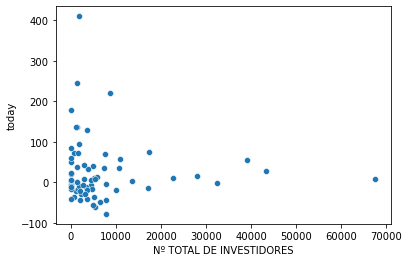

In [14]:
sns.scatterplot(data=detailed, x='Nº TOTAL DE INVESTIDORES', y= 'today')

In [15]:
DF = detailed[['Nº TOTAL DE INVESTIDORES', 'today']]

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
kmeans.fit(DF)

KMeans(n_clusters=3)

In [18]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

<AxesSubplot:xlabel='Nº TOTAL DE INVESTIDORES', ylabel='today'>

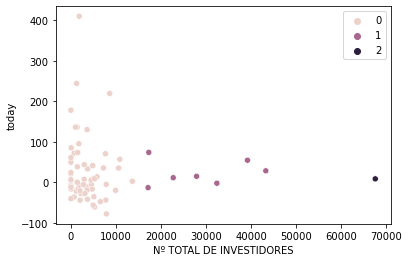

In [19]:
sns.scatterplot(data=DF, x="Nº TOTAL DE INVESTIDORES", y="today", hue=kmeans.labels_)

Logo, pode-se perceber, que nossos dados não formam grupos, mas o grafico formou um padrão interessante